# Introduction to `fastplotlib` 🚀

This notebook goes through the basic components of the `fastplotlib` API, image, line, scatter plots, subplots and simple animations

**The example images are from `imageio` so you will need to install it for this example notebook. But `imageio` is not required to use `fasptlotlib`**

In [1]:
!pip install imageio

In [2]:
import imageio.v3 as iio

In [3]:
import numpy as np
import fastplotlib as fpl

from ipywidgets import HBox
from pprint import pprint

MESA-INTEL: warning: cannot initialize blitter engine
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01,\x00\x00\x007\x08\x06\x00\x00\x00\xb6\x1bw\x99\x…

Valid,Device,Type,Backend,Driver
✅ (default),Intel(R) Arc(tm) Graphics (MTL),IntegratedGPU,Vulkan,Mesa 24.0.8-1
❗ limited,"llvmpipe (LLVM 17.0.6, 256 bits)",CPU,Vulkan,Mesa 24.0.8-1 (LLVM 17.0.6)
❌,Mesa Intel(R) Arc(tm) Graphics (MTL),IntegratedGPU,OpenGL,4.6 (Core Profile) Mesa 24.0.8-1


To silence this warning, use a fully namespaced name.
To silence this warning, use a fully namespaced name.
To silence this warning, use a fully namespaced name.
To silence this warning, use a fully namespaced name.
To silence this warning, use a fully namespaced name.
To silence this warning, use a fully namespaced name.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.
Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.


## Simple image

We are going to be using `jupyterlab-sidecar` to render some of the plots on the side. This makes it very easy to interact with your plots without having to constantly scroll up and down :D

In [4]:
# create a `Figure` instance
# by default the figure will have 1 subplot
fig = fpl.Figure()

# get a grayscale image
image_data = iio.imread("imageio:camera.png")

# plot the image data
image_graphic = fig[0, 0].add_image(data=image_data, name="sample-image")

# show the plot
fig.show(sidecar=True)

RFBOutputContext()

Detected skylake derivative running on mesa i915. Clears to srgb textures will use manual shader clears.


**Use the handle on the bottom right corner of the _canvas_ to resize it. You can also pan and zoom using your mouse!**

### Changing graphic properties

In [5]:
image_graphic.cmap = "gray"

**Some properties, such as `data` support slicing!**

Out image data is of shape [n_rows, n_cols]

In [6]:
# many graphic properties behave like arrays
# access the underlying array using .value
image_graphic.data.value.shape

(512, 512)

In [7]:
# Get a view of the buffer

image_graphic.data[10:20, :5]

array([[200., 200., 201., 200., 200.],
       [201., 199., 200., 200., 199.],
       [200., 199., 198., 200., 200.],
       [200., 199., 199., 199., 200.],
       [201., 199., 200., 200., 199.],
       [201., 201., 201., 199., 201.],
       [200., 201., 201., 200., 200.],
       [200., 201., 201., 200., 200.],
       [200., 202., 199., 201., 201.],
       [201., 201., 200., 201., 201.]], dtype=float32)

In [8]:
# set data, behaves just like a numpy array

image_graphic.data[::15, :] = 1
image_graphic.data[:, ::15] = 1

**Fancy indexing!**

In [9]:
image_graphic.data[image_data > 100] = 255

## Events

In [10]:
@image_graphic.add_event_handler("click")
def add_point(ev):
    x, y = ev.pick_info["index"]
    point = np.array([[x, y]])
    fig[0, 0].add_scatter(point, colors="r", sizes=20)

In [11]:
fig.close()

# `ImageWidget` 

Explore 2D, 3D or 4D image data. Creates sliders & histogram-LUT tools.

In [12]:
video = iio.imread("imageio:cockatoo.mp4")
video.shape  # shape is [t, row, col, rgb]

(280, 720, 1280, 3)

RFBOutputContext()

/home/caitlin/repos/fastplotlib/fastplotlib/graphics/_features/_base.py:18: UserWarning: casting float64 array to float32
  warn(f"casting {array.dtype} array to float32")


JupyterWgpuCanvas(css_height='500px', css_width='700px')
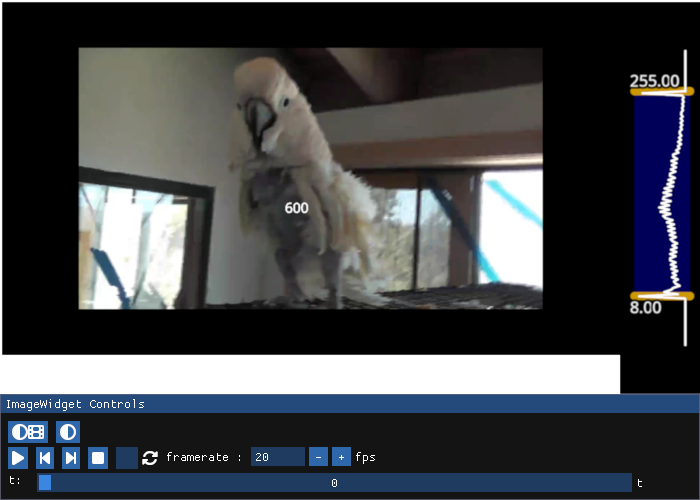

In [13]:
iw_video = fpl.ImageWidget(video, rgb=[True], figure_kwargs={"size": (700, 500)})
iw_video.show()

In [14]:
iw_video.close()

In [16]:
data_3d = np.load("./zfish_test.npy")
data_3d.shape  # shape is [t, z, row, col]

(100, 4, 256, 256)

In [17]:
iw_3d = fpl.ImageWidget(data_3d, cmap="gnuplot2", figure_kwargs={"size": (500, 600)})

iw_planes = fpl.ImageWidget([data_3d[:, i] for i in range(data_3d.shape[1])], cmap="gnuplot2", figure_kwargs={"size": (600, 600)})

HBox([iw_3d.show(), iw_planes.show()])

RFBOutputContext()

RFBOutputContext()

In [18]:
# close the plot 
iw_3d.close()
iw_planes.close()

# Line plots

## 2D line plots

### First generate some data.

In [19]:
# linspace, create 100 evenly spaced x values from to 10pi
xs = np.linspace(0, np.pi * 10, 100)
# sine wave
ys = np.sin(xs)
sine = np.column_stack([xs, ys])

# cosine wave
ys = np.cos(xs)
cosine = np.column_stack([xs, ys])

### We will plot all of it on the same plot. Each line plot will be an individual Graphic, you can have any combination of graphics on a plot.

In [20]:
# Create a figure
fig_lines = fpl.Figure(shape=(2, 1), size=(500, 800), names=[["lines", "zoomed"]])

# plot sine wave, use a single color
sine_graphic = fig_lines["lines"].add_line(data=sine, thickness=5, colors="magenta")

# you can also use colormaps for lines!
cosine_graphic = fig_lines["lines"].add_line(data=cosine, thickness=12, cmap="autumn", offset=(0, 5, 0))

# show the plot
fig_lines.show(maintain_aspect=False, sidecar=True, sidecar_kwargs={"title": "lines"})

RFBOutputContext()

/home/caitlin/repos/fastplotlib/fastplotlib/graphics/_features/_base.py:18: UserWarning: casting float64 array to float32
  warn(f"casting {array.dtype} array to float32")


### Colors behave like a numpy array!

In [22]:
cosine_graphic.colors[:30:2] = "cyan"

In [23]:
# more complex slicing, set the blue value directly from an array
cosine_graphic.colors[65:90, 0] = np.linspace(0, 1, 90-65)

## Graphic properties are evented

https://fastplotlib.readthedocs.io/en/latest/user_guide/guide.html#events

In [24]:
@cosine_graphic.add_event_handler("colors")
def colors_changed(ev):
    pprint(ev.info)

In [25]:
cosine_graphic.colors[90:] = "blue"

{'key': slice(90, None, None),
 'user_value': 'blue',
 'value': array([[0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.],
       [0., 0., 1., 1.]], dtype=float32)}


**cmap and cmap transforms onto a line**

In [26]:
# assign colormaps to a line
sine_graphic.cmap = "seismic"

In [27]:
# set a cmap_transform
sine_graphic.cmap.transform = sine_graphic.data[:, 1]

# Selector tools

https://fastplotlib.readthedocs.io/en/latest/user_guide/guide.html#selectors

In [28]:
# Add a linear region selector to the sine graphic
region_selector = sine_graphic.add_linear_region_selector()
region_selector.offset = (0, 0, 2)

# Add a line to the bottom "zoomed" subplot that displays the selected data
fig_lines["zoomed"].add_line(
    region_selector.get_selected_data(),  # selected data
    colors=sine_graphic.colors[region_selector.get_selected_indices()],  # same colors
    name="selected-region"
)

fig_lines["zoomed"].auto_scale(maintain_aspect=False)

@region_selector.add_event_handler("selection")
def update(ev):
    """
    Updates the "zoomed" subplot with the selected region of the line
    """
    data = ev.get_selected_data()
    indices = ev.get_selected_indices()
    
    sub = fig_lines["zoomed"]["selected-region"]
    if sub.data[:].shape == data.shape:
        sub.data = data
        sub.colors = sine_graphic.colors[indices]
    else:
        fig_lines["zoomed"].clear()
        fig_lines["zoomed"].add_line(
            data, 
            colors=sine_graphic.colors[indices],
            thickness=5,
            name="selected-region"
        )

    fig_lines["zoomed"].auto_scale(maintain_aspect=False)

In [29]:
fig_lines.close()

# Scatter plots

In [36]:
# create a random distribution points
n_points = 50_000

# dimensions always have to be [n_points, xyz]
dims = (n_points, 3)

clouds_offset = 15

# create some random clouds
normal = np.random.normal(size=dims, scale=5)
# stack the data into a single array
cloud = np.vstack(
    [
        normal - clouds_offset,
        normal,
        normal + clouds_offset,
    ]
)

# color each of them separately
colors = ["yellow"] * n_points + ["cyan"] * n_points + ["magenta"] * n_points

In [37]:
# create plot
fig_scatter = fpl.Figure(size=(600, 500))
subplot_scatter = fig_scatter[0, 0]

scatter_graphic = subplot_scatter.add_scatter(data=cloud, sizes=3, colors=colors, alpha=0.1)

fig_scatter.show(sidecar=True)

RFBOutputContext()

### scatter graphic properties work similarly to line graphics

In [38]:
# half of the first cloud's points to red
scatter_graphic.colors[:n_points:2] = "r"

In [39]:
# change the data, change y-values
scatter_graphic.data[n_points:n_points * 2, 1] += 15

**Switch to a fly controller to move around the plot in 3D!**

## Animation

Move the cloud by a small delta on every render cycle

In [40]:
def update_points(subplot):
    # move every point by a small amount
    deltas = np.random.normal(size=scatter_graphic.data.value.shape, loc=0, scale=0.15)
    scatter_graphic.data = scatter_graphic.data[:] + deltas

subplot_scatter.add_animations(update_points)

Another animation function to cycle the colors of one of the clouds

In [41]:
i = 0.05
def cycle_colors(subplot):
    global i
    # cycle the red values
    scatter_graphic.colors[n_points * 2:, 0] = np.abs(np.sin(i))
    scatter_graphic.colors[n_points * 2:, 1] = np.abs(np.sin(i + (np.pi / 4)))
    scatter_graphic.colors[n_points * 2:, 2] = np.abs(np.cos(i))
    i += 0.05

subplot_scatter.add_animations(cycle_colors)

In [42]:
# close figure
fig_scatter.close()